#Resnet18

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import .

, ConcatDataset
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2

# read the input image
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/direction/Directions01/Directions01/train/down/0.png')

# image properties
print("Type:",type(img))
print("Shape of Image:", img.shape)
print('Total Number of pixels:', img.size)
print("Image data type:", img.dtype)

# print("Pixel Values:\n", img)
print("Dimension:", img.ndim)

Type: <class 'numpy.ndarray'>
Shape of Image: (128, 128, 3)
Total Number of pixels: 49152
Image data type: uint8
Dimension: 3


In [ ]:
import cv2

# read the input image
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/direction/Directions01_Index/Directions01_Index/test/down/1.png')

# image properties
print("Type:",type(img))
print("Shape of Image:", img.shape)
print('Total Number of pixels:', img.size)
print("Image data type:", img.dtype)

# print("Pixel Values:\n", img)
print("Dimension:", img.ndim)

Type: <class 'numpy.ndarray'>
Shape of Image: (128, 128, 3)
Total Number of pixels: 49152
Image data type: uint8
Dimension: 3


In [ ]:
import cv2

# read the input image
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/direction/Directions01_RGB/Directions01_RGB/test/down/1.png')

# image properties
print("Type:",type(img))
print("Shape of Image:", img.shape)
print('Total Number of pixels:', img.size)
print("Image data type:", img.dtype)

# print("Pixel Values:\n", img)
print("Dimension:", img.ndim)

Type: <class 'numpy.ndarray'>
Shape of Image: (128, 128, 3)
Total Number of pixels: 49152
Image data type: uint8
Dimension: 3


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
import os

In [ ]:
data_dirs = [
    '/content/drive/MyDrive/Colab Notebooks/direction/Directions01/Directions01',
    '/content/drive/MyDrive/Colab Notebooks/direction/Directions01_Index/Directions01_Index',
    '/content/drive/MyDrive/Colab Notebooks/direction/Directions01_RGB/Directions01_RGB'
]

# Define transformations
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

def load_dataset(data_dir):
    return {
        'train': datasets.ImageFolder(
            os.path.join(data_dir, 'train'),
            transform=data_transforms
        ),
        'test': datasets.ImageFolder(
            os.path.join(data_dir, 'test'),
            transform=data_transforms
        )
    }

# Initialize empty lists for train and test datasets
train_datasets = []
test_datasets = []

# Load datasets from each directory
for dir in data_dirs:
    datasets_dict = load_dataset(dir)
    train_datasets.append(datasets_dict['train'])
    test_datasets.append(datasets_dict['test'])

# Concatenate datasets
combined_train_dataset = ConcatDataset(train_datasets)
combined_test_dataset = ConcatDataset(test_datasets)

# Retrieve class names from the first dataset


# Create DataLoaders
dataloaders = {
    'train': DataLoader(combined_train_dataset, batch_size=32, shuffle=True, num_workers=4),
    'test': DataLoader(combined_test_dataset, batch_size=32, shuffle=False, num_workers=4),
}

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
dataset_sizes = {x: len(dataloaders[x].dataset) for x in ['train', 'test']}
class_names = train_datasets[0].classes

In [ ]:
class_names
dataset_sizes

{'train': 2844, 'test': 120}

In [ ]:
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(class_names))

model = model.to(device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

In [ ]:
num_epochs = 10
total_step = len(dataloaders['train'])
epoch_losses = []
all_preds = []
all_labels = []

In [ ]:
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    # Training loop
    for i, (inputs, labels) in enumerate(dataloaders['train']):
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Accumulate loss
        running_loss += loss.item()


    print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))

    # Calculate and store average loss for the epoch
    epoch_loss = running_loss / total_step
    epoch_losses.append(epoch_loss)
    print(f'Average Loss for Epoch [{epoch + 1}/{num_epochs}]: {epoch_loss:.4f}')


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch [1/10], Step [89/89], Loss: 0.0000
Average Loss for Epoch [1/10]: 0.0000
Epoch [2/10], Step [89/89], Loss: 0.0000
Average Loss for Epoch [2/10]: 0.0000
Epoch [3/10], Step [89/89], Loss: 0.0001
Average Loss for Epoch [3/10]: 0.0000
Epoch [4/10], Step [89/89], Loss: 0.0000
Average Loss for Epoch [4/10]: 0.0000
Epoch [5/10], Step [89/89], Loss: 0.0000
Average Loss for Epoch [5/10]: 0.0000
Epoch [6/10], Step [89/89], Loss: 0.0000
Average Loss for Epoch [6/10]: 0.0000
Epoch [7/10], Step [89/89], Loss: 0.0000
Average Loss for Epoch [7/10]: 0.0000
Epoch [8/10], Step [89/89], Loss: 0.0000
Average Loss for Epoch [8/10]: 0.0000
Epoch [9/10], Step [89/89], Loss: 0.0000
Average Loss for Epoch [9/10]: 0.0000
Epoch [10/10], Step [89/89], Loss: 0.0000
Average Loss for Epoch [10/10]: 0.0000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


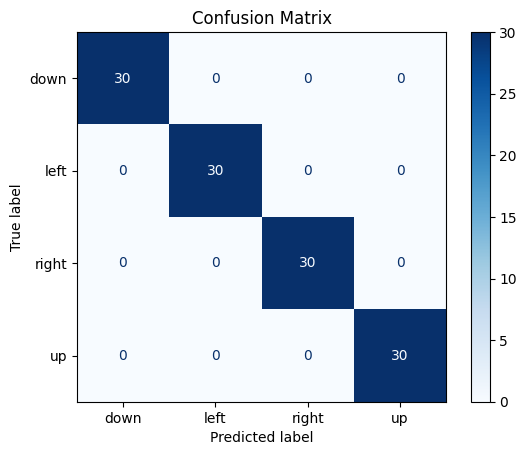

In [ ]:
# Evaluate on the test set and calculate confusion matrix
model.eval()
all_preds_epoch = []
all_labels_epoch = []

with torch.no_grad():
    for inputs, labels in dataloaders['test']:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        all_preds_epoch.extend(preds.cpu().numpy())
        all_labels_epoch.extend(labels.cpu().numpy())

# Calculate confusion matrix for this epoch
cm = confusion_matrix(all_labels_epoch, all_preds_epoch)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix')
plt.show()

all_preds.append(all_preds_epoch)
all_labels.append(all_labels_epoch)

In [ ]:


"""for epoch in range(num_epochs):
    model.train()

    for i, (inputs, labels) in enumerate(dataloaders['train']):

        inputs, labels = inputs.to(device), labels.to(device)


        outputs = model(inputs)
        loss = criterion(outputs, labels)


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 10 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))"""


"for epoch in range(num_epochs):\n    model.train()\n\n    for i, (inputs, labels) in enumerate(dataloaders['train']):\n\n        inputs, labels = inputs.to(device), labels.to(device)\n\n\n        outputs = model(inputs)\n        loss = criterion(outputs, labels)\n\n\n        optimizer.zero_grad()\n        loss.backward()\n        optimizer.step()\n\n        if (i + 1) % 10 == 0:\n            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'\n                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))"

In [ ]:
def resnet18_test():
    model.eval()
    correct = 0
    total = 0


    for images, labels in dataloaders['test']:
        images = images.to(device)
        labels = labels.to(device)

        test_output = model(images)
        pred_y = torch.max(test_output, 1)[1].data.squeeze()

        total += labels.size(0)
        correct += (pred_y == labels).sum().item()

    accuracy = 100 * correct / total
    print('Test Accuracy of the model on the test images: {:.2f}%'.format(accuracy))



In [ ]:
resnet18_test()

Test Accuracy of the model on the test images: 100.00%


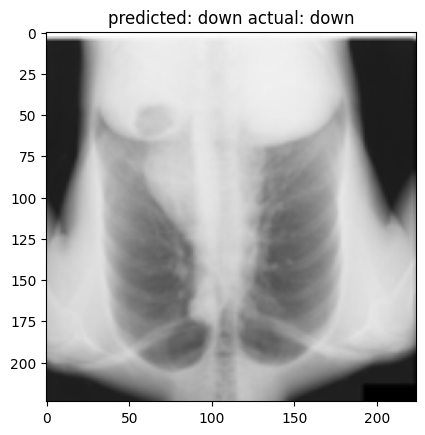

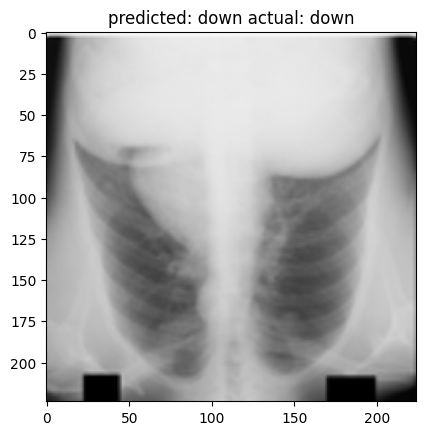

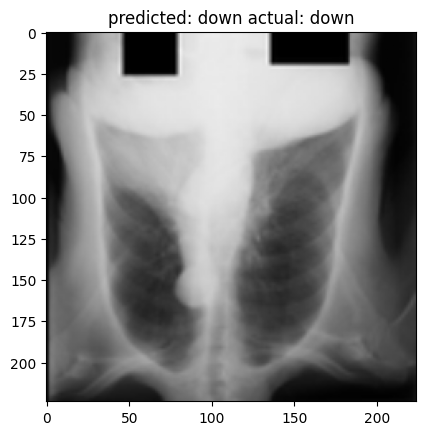

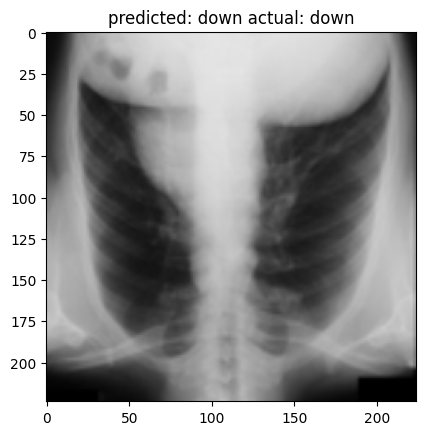

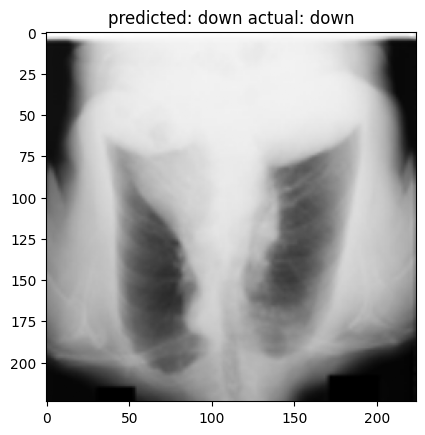

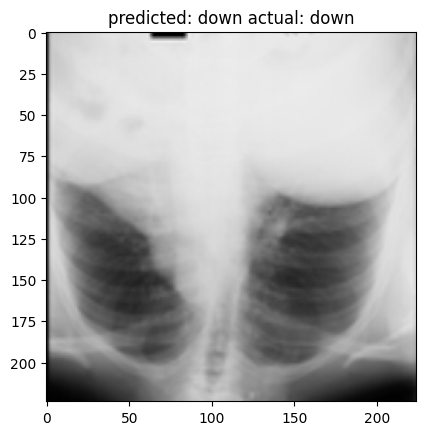

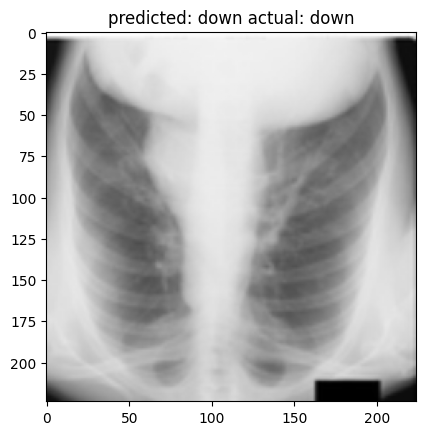

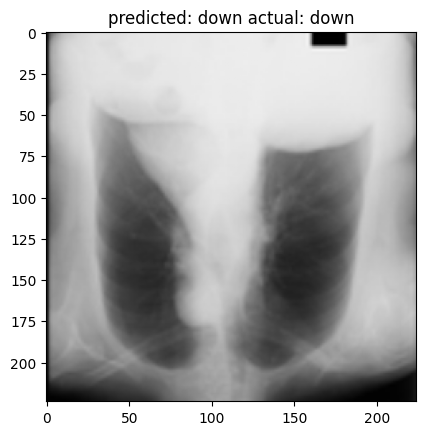

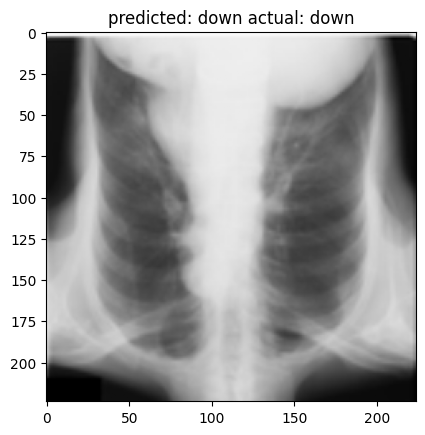

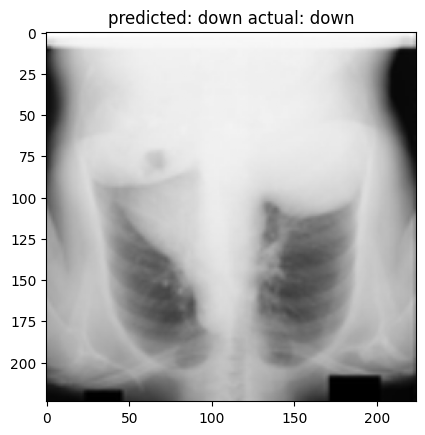

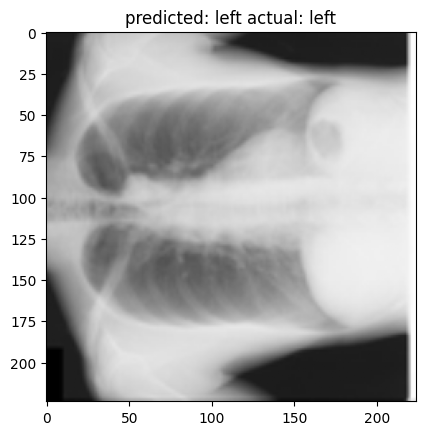

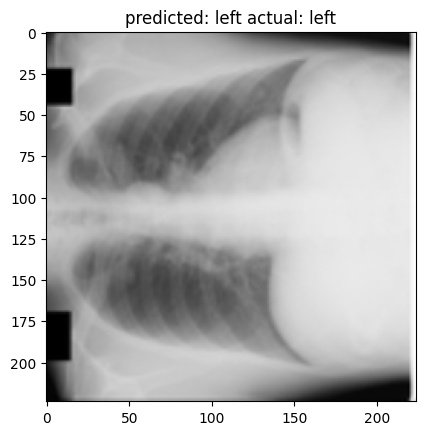

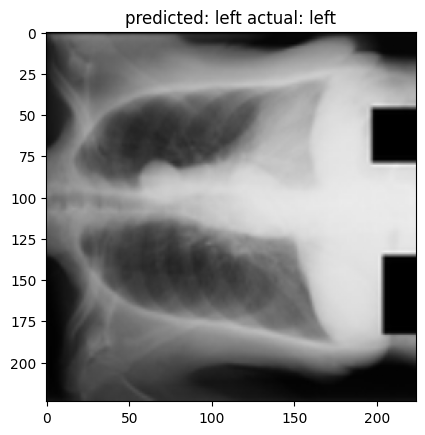

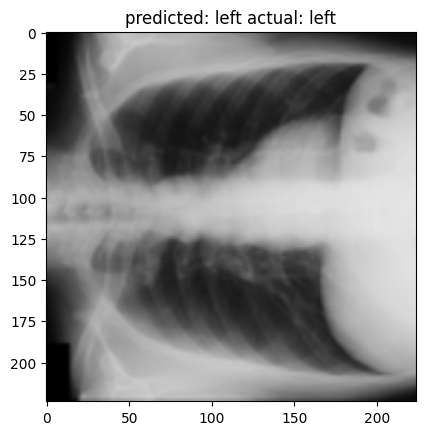

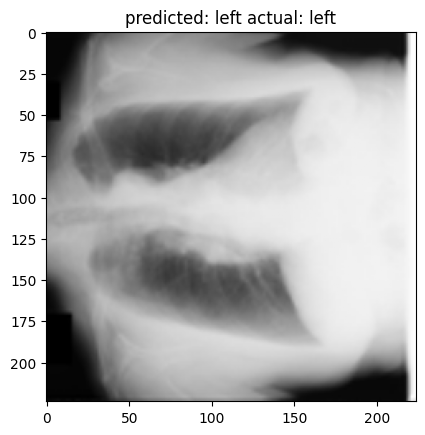

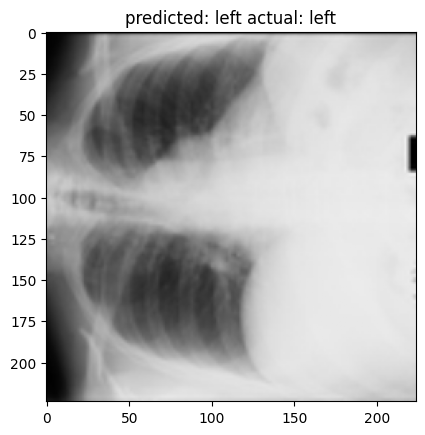

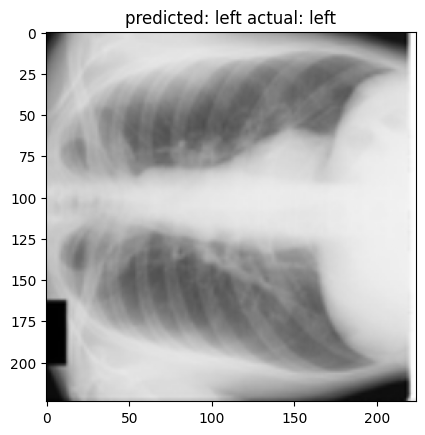

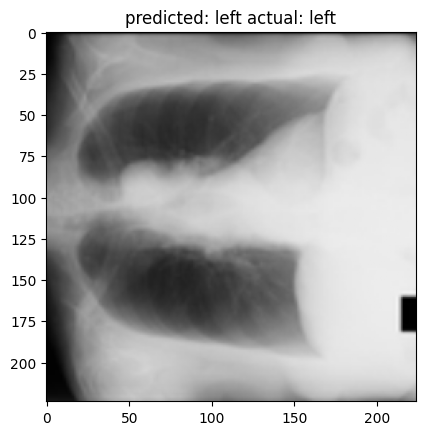

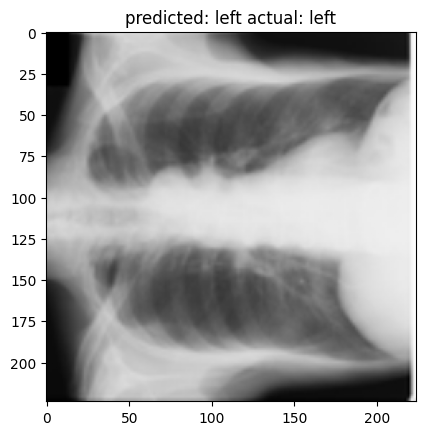

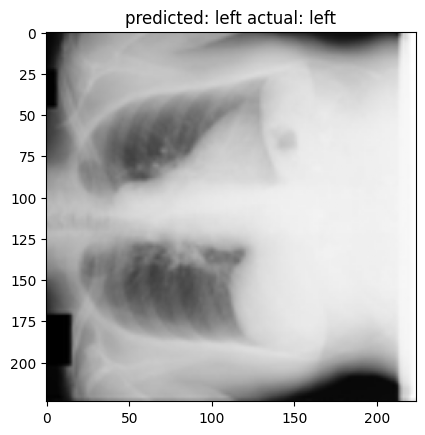

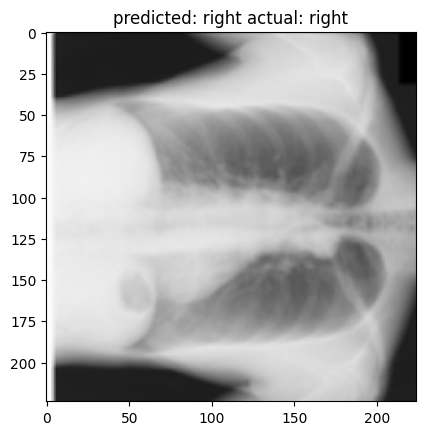

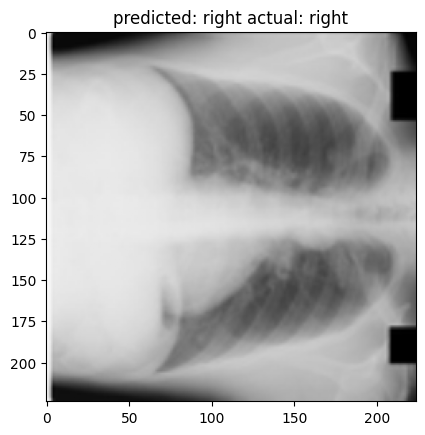

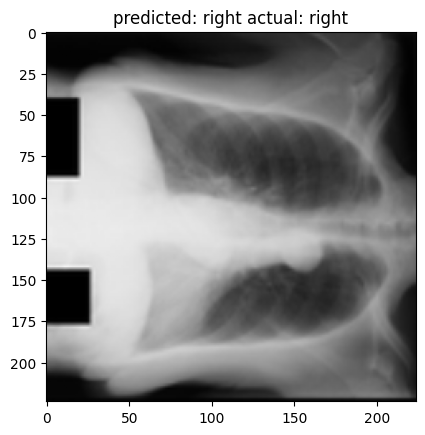

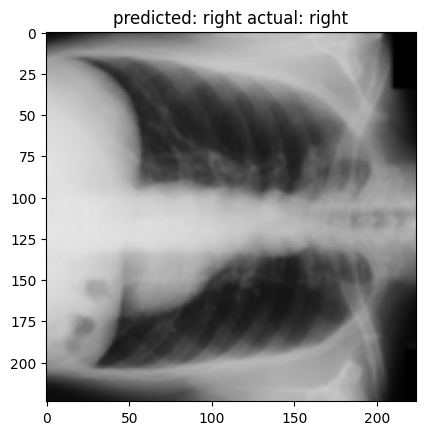

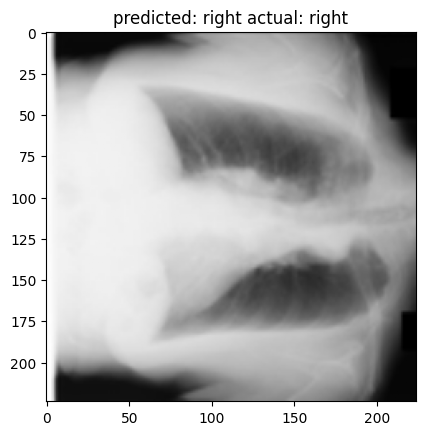

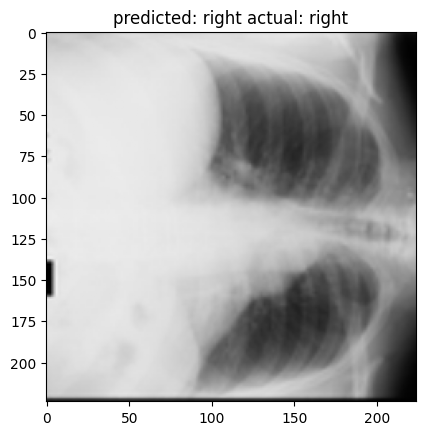

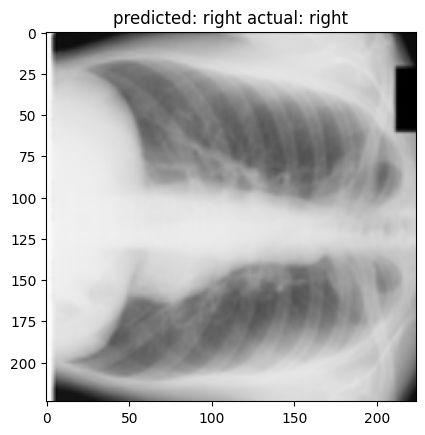

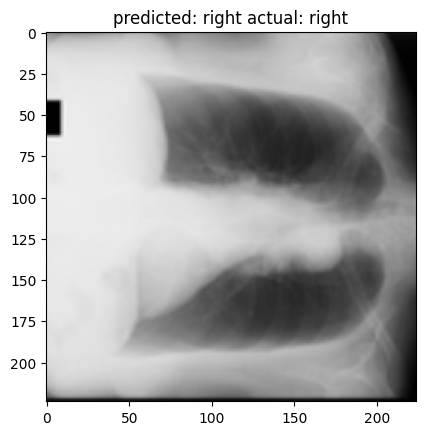

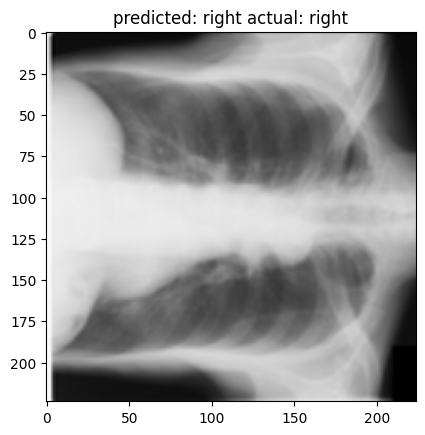

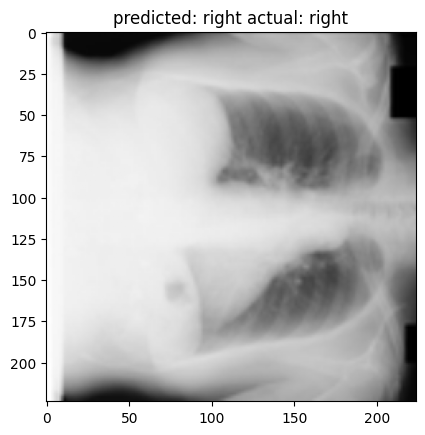

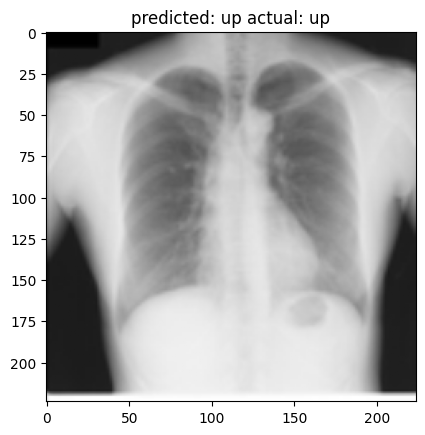

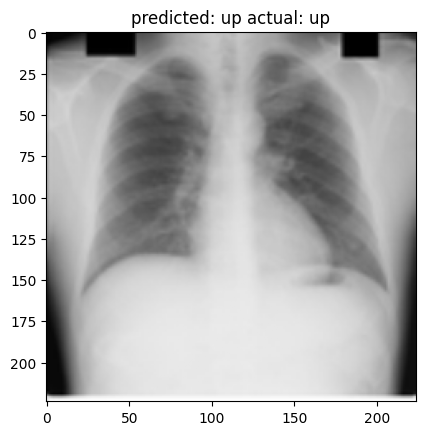

In [ ]:
import matplotlib.pyplot as plt

def imshow(inp, title=None):

    inp = inp.numpy().transpose((1, 2, 0))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)


inputs, classes = next(iter(dataloaders['test']))


inputs = inputs.to(device)
outputs = model(inputs)
_, preds = torch.max(outputs, 1)

for j in range(32):
    plt.figure()
    imshow(inputs.cpu().data[j], title='predicted: {} actual: {}'.format(class_names[preds[j]], class_names[classes[j]]))


#Resnet50

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch [1/10], Step [89/89], Loss: 0.0032
Average Loss for Epoch [1/10]: 0.0541
Epoch [1/10], Train Loss: 0.0541, Test Loss: 0.0001
Epoch [2/10], Step [89/89], Loss: 0.0000
Average Loss for Epoch [2/10]: 0.0005
Epoch [2/10], Train Loss: 0.0005, Test Loss: 0.0001
Epoch [3/10], Step [89/89], Loss: 0.0000
Average Loss for Epoch [3/10]: 0.0003
Epoch [3/10], Train Loss: 0.0003, Test Loss: 0.0000
Epoch [4/10], Step [89/89], Loss: 0.0001
Average Loss for Epoch [4/10]: 0.0001
Epoch [4/10], Train Loss: 0.0001, Test Loss: 0.0000
Epoch [5/10], Step [89/89], Loss: 0.0743
Average Loss for Epoch [5/10]: 0.0186
Epoch [5/10], Train Loss: 0.0186, Test Loss: 1.2318
Epoch [6/10], Step [89/89], Loss: 0.0079
Average Loss for Epoch [6/10]: 0.0167
Epoch [6/10], Train Loss: 0.0167, Test Loss: 0.0939
Epoch [7/10], Step [89/89], Loss: 0.0000
Average Loss for Epoch [7/10]: 0.0060
Epoch 

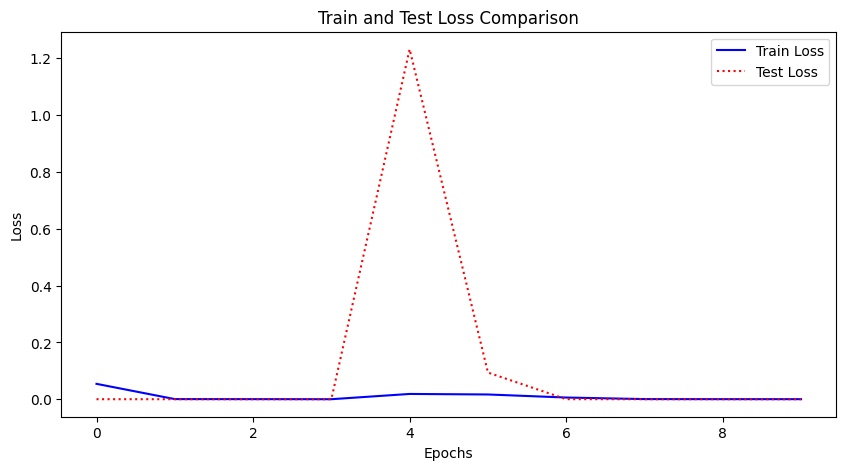

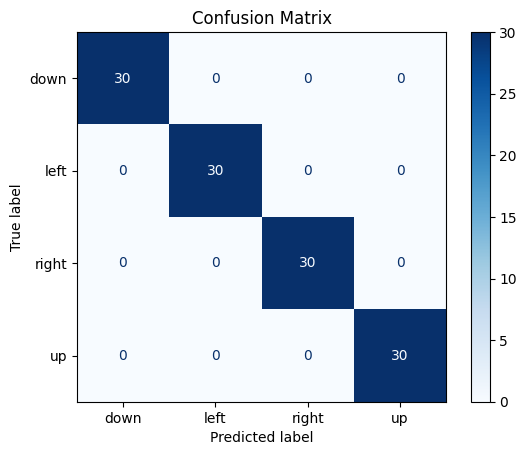

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, ConcatDataset
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Device configuration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Directories for datasets
data_dirs = [
    '/content/drive/MyDrive/Colab Notebooks/direction/Directions01/Directions01',
    '/content/drive/MyDrive/Colab Notebooks/direction/Directions01_Index/Directions01_Index',
    '/content/drive/MyDrive/Colab Notebooks/direction/Directions01_RGB/Directions01_RGB'
]

# Define transformations
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Function to load datasets
def load_dataset(data_dir):
    return {
        'train': datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=data_transforms),
        'test': datasets.ImageFolder(os.path.join(data_dir, 'test'), transform=data_transforms)
    }

# Load datasets from each directory
train_datasets = []
test_datasets = []

for dir in data_dirs:
    datasets_dict = load_dataset(dir)
    train_datasets.append(datasets_dict['train'])
    test_datasets.append(datasets_dict['test'])

# Concatenate datasets
combined_train_dataset = ConcatDataset(train_datasets)
combined_test_dataset = ConcatDataset(test_datasets)

# Create DataLoaders
dataloaders = {
    'train': DataLoader(combined_train_dataset, batch_size=32, shuffle=True, num_workers=4),
    'test': DataLoader(combined_test_dataset, batch_size=32, shuffle=False, num_workers=4),
}

dataset_sizes = {x: len(dataloaders[x].dataset) for x in ['train', 'test']}
class_names = train_datasets[0].classes

# Initialize the ResNet-50 model
model = models.resnet50(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(class_names))
model = model.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training configuration
num_epochs = 10
train_losses = []
test_losses = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0

    # Training
    for i, (inputs, labels) in enumerate(dataloaders['train']):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()
    print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, i + 1, len(dataloaders['train']), loss.item()))

    epoch_train_loss = running_train_loss / len(dataloaders['train'])
    train_losses.append(epoch_train_loss)
    print(f'Average Loss for Epoch [{epoch + 1}/{num_epochs}]: {epoch_train_loss:.4f}')
    # Validation
    model.eval()
    running_test_loss = 0.0
    with torch.no_grad():
        for inputs, labels in dataloaders['test']:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_test_loss += loss.item()

    epoch_test_loss = running_test_loss / len(dataloaders['test'])
    test_losses.append(epoch_test_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Test Loss: {epoch_test_loss:.4f}')




# Plotting the Train and Test Losses
plt.figure(figsize=(10, 5))
plt.plot(range(num_epochs), train_losses, label='Train Loss', color='blue', linestyle='-')
plt.plot(range(num_epochs), test_losses, label='Test Loss', color='red', linestyle=':')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Loss Comparison')
plt.legend()
plt.show()

# Confusion Matrix after training
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in dataloaders['test']:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can als

Epoch [1/10], Train Loss: 0.0401, Test Loss: 0.0000
Epoch [2/10], Train Loss: 0.0102, Test Loss: 0.1331
Epoch [3/10], Train Loss: 0.0084, Test Loss: 0.0000
Epoch [4/10], Train Loss: 0.0004, Test Loss: 0.0002
Epoch [5/10], Train Loss: 0.0001, Test Loss: 0.0000
Epoch [6/10], Train Loss: 0.0001, Test Loss: 0.0000
Epoch [7/10], Train Loss: 0.0000, Test Loss: 0.0000
Epoch [8/10], Train Loss: 0.0000, Test Loss: 0.0000
Epoch [9/10], Train Loss: 0.0000, Test Loss: 0.0000
Epoch [10/10], Train Loss: 0.0000, Test Loss: 0.0000
Epoch [1/10], Train Loss: 0.0509, Test Loss: 0.0263
Epoch [2/10], Train Loss: 0.0184, Test Loss: 6.4664
Epoch [3/10], Train Loss: 0.0065, Test Loss: 0.0004
Epoch [4/10], Train Loss: 0.0006, Test Loss: 0.0000
Epoch [5/10], Train Loss: 0.0003, Test Loss: 0.0000
Epoch [6/10], Train Loss: 0.0188, Test Loss: 37.5903
Epoch [7/10], Train Loss: 0.0173, Test Loss: 0.0006
Epoch [8/10], Train Loss: 0.0040, Test Loss: 0.2550
Epoch [9/10], Train Loss: 0.0132, Test Loss: 0.0936
Epoch [10/

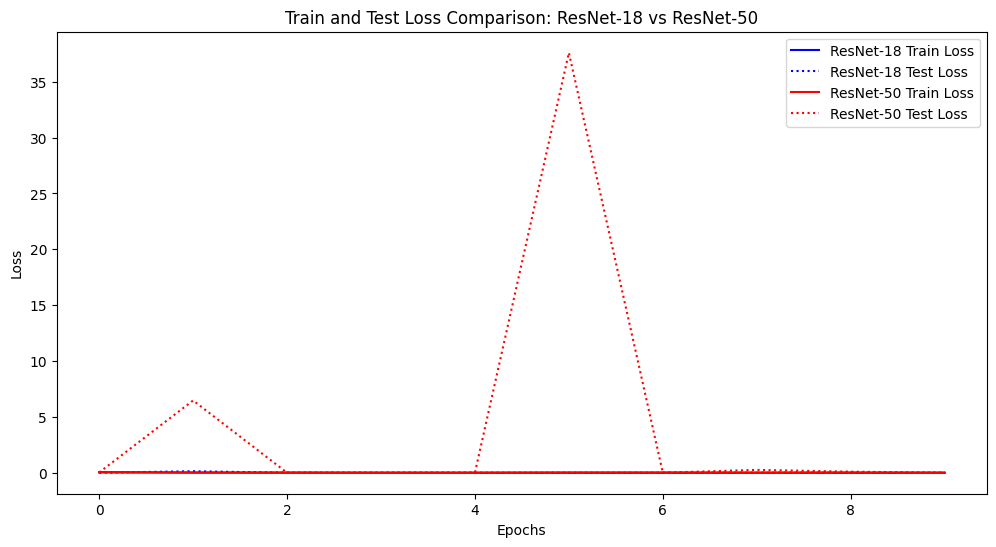

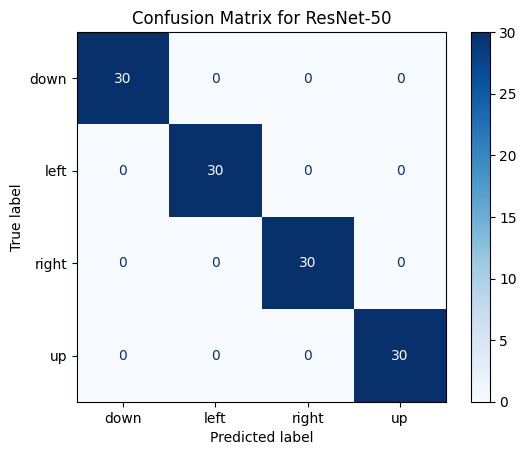

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, ConcatDataset
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Device configuration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Directories for datasets
data_dirs = [
    '/content/drive/MyDrive/Colab Notebooks/direction/Directions01/Directions01',
    '/content/drive/MyDrive/Colab Notebooks/direction/Directions01_Index/Directions01_Index',
    '/content/drive/MyDrive/Colab Notebooks/direction/Directions01_RGB/Directions01_RGB'
]

# Define transformations
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Function to load datasets
def load_dataset(data_dir):
    return {
        'train': datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=data_transforms),
        'test': datasets.ImageFolder(os.path.join(data_dir, 'test'), transform=data_transforms)
    }

# Load datasets from each directory
train_datasets = []
test_datasets = []

for dir in data_dirs:
    datasets_dict = load_dataset(dir)
    train_datasets.append(datasets_dict['train'])
    test_datasets.append(datasets_dict['test'])

# Concatenate datasets
combined_train_dataset = ConcatDataset(train_datasets)
combined_test_dataset = ConcatDataset(test_datasets)

# Create DataLoaders
dataloaders = {
    'train': DataLoader(combined_train_dataset, batch_size=32, shuffle=True, num_workers=4),
    'test': DataLoader(combined_test_dataset, batch_size=32, shuffle=False, num_workers=4),
}

dataset_sizes = {x: len(dataloaders[x].dataset) for x in ['train', 'test']}
class_names = train_datasets[0].classes

# Function to train a model and return losses
def train_model(model, criterion, optimizer, num_epochs=10):
    train_losses = []
    test_losses = []

    for epoch in range(num_epochs):
        model.train()
        running_train_loss = 0.0

        # Training
        for i, (inputs, labels) in enumerate(dataloaders['train']):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            running_train_loss += loss.item()

        epoch_train_loss = running_train_loss / len(dataloaders['train'])
        train_losses.append(epoch_train_loss)

        # Validation
        model.eval()
        running_test_loss = 0.0
        with torch.no_grad():
            for inputs, labels in dataloaders['test']:
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                running_test_loss += loss.item()

        epoch_test_loss = running_test_loss / len(dataloaders['test'])
        test_losses.append(epoch_test_loss)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Test Loss: {epoch_test_loss:.4f}')

    return train_losses, test_losses

# Initialize ResNet-18 model
resnet18_model = models.resnet18(pretrained=True)
num_ftrs = resnet18_model.fc.in_features
resnet18_model.fc = nn.Linear(num_ftrs, len(class_names))
resnet18_model = resnet18_model.to(device)

# Initialize ResNet-50 model
resnet50_model = models.resnet50(pretrained=True)
num_ftrs = resnet50_model.fc.in_features
resnet50_model.fc = nn.Linear(num_ftrs, len(class_names))
resnet50_model = resnet50_model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()

# Train ResNet-18
optimizer_18 = optim.Adam(resnet18_model.parameters(), lr=0.001)
resnet18_train_losses, resnet18_test_losses = train_model(resnet18_model, criterion, optimizer_18)

# Train ResNet-50
optimizer_50 = optim.Adam(resnet50_model.parameters(), lr=0.001)
resnet50_train_losses, resnet50_test_losses = train_model(resnet50_model, criterion, optimizer_50)

# Plotting the Train and Test Losses for ResNet-18 and ResNet-50
plt.figure(figsize=(12, 6))
plt.plot(range(num_epochs), resnet18_train_losses, label='ResNet-18 Train Loss', color='blue', linestyle='-')
plt.plot(range(num_epochs), resnet18_test_losses, label='ResNet-18 Test Loss', color='blue', linestyle=':')
plt.plot(range(num_epochs), resnet50_train_losses, label='ResNet-50 Train Loss', color='red', linestyle='-')
plt.plot(range(num_epochs), resnet50_test_losses, label='ResNet-50 Test Loss', color='red', linestyle=':')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Loss Comparison: ResNet-18 vs ResNet-50')
plt.legend()
plt.show()

# Confusion Matrix for ResNet-50 after training
model = resnet50_model  # Use ResNet-50 for confusion matrix
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in dataloaders['test']:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for ResNet-50')
plt.show()


#Swin_Tiny

#Classification V2



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/10
----------
Train Loss: 0.0256 Acc: 0.9895 AUC: 0.9999


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Test Loss: 0.0000 Acc: 1.0000 AUC: 1.0000
Epoch 2/10
----------


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Train Loss: 0.0001 Acc: 1.0000 AUC: 1.0000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Test Loss: 0.0000 Acc: 1.0000 AUC: 1.0000
Epoch 3/10
----------


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Train Loss: 0.0000 Acc: 1.0000 AUC: 1.0000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Test Loss: 0.0000 Acc: 1.0000 AUC: 1.0000
Epoch 4/10
----------


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Train Loss: 0.0000 Acc: 1.0000 AUC: 1.0000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Test Loss: 0.0000 Acc: 1.0000 AUC: 1.0000
Epoch 5/10
----------


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Train Loss: 0.0000 Acc: 1.0000 AUC: 1.0000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Test Loss: 0.0000 Acc: 1.0000 AUC: 1.0000
Epoch 6/10
----------


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Train Loss: 0.0000 Acc: 1.0000 AUC: 1.0000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Test Loss: 0.0000 Acc: 1.0000 AUC: 1.0000
Epoch 7/10
----------


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Train Loss: 0.0000 Acc: 1.0000 AUC: 1.0000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Test Loss: 0.0000 Acc: 1.0000 AUC: 1.0000
Epoch 8/10
----------


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Train Loss: 0.0000 Acc: 1.0000 AUC: 1.0000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Test Loss: 0.0003 Acc: 1.0000 AUC: 1.0000
Epoch 9/10
----------


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Train Loss: 0.0001 Acc: 1.0000 AUC: 1.0000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Test Loss: 0.0000 Acc: 1.0000 AUC: 1.0000
Epoch 10/10
----------


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Train Loss: 0.0000 Acc: 1.0000 AUC: 1.0000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Test Loss: 0.0000 Acc: 1.0000 AUC: 1.0000


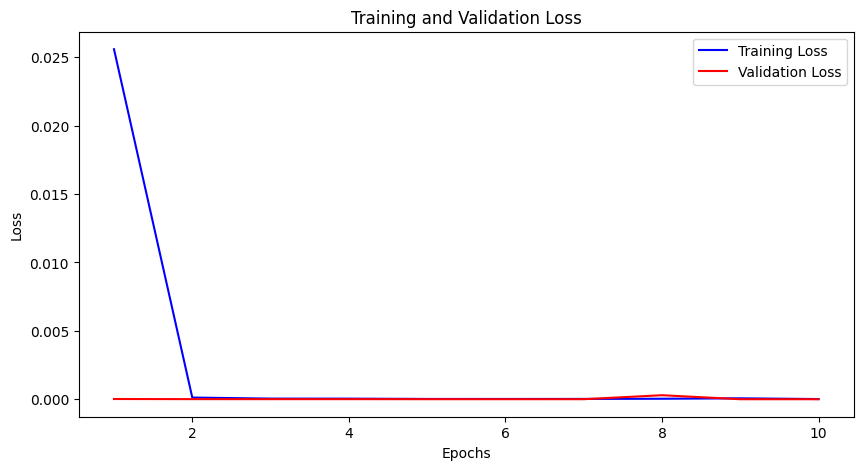

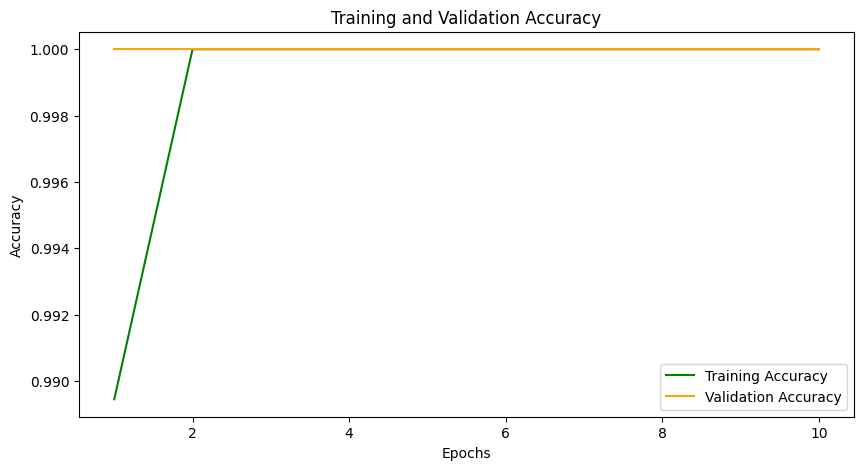

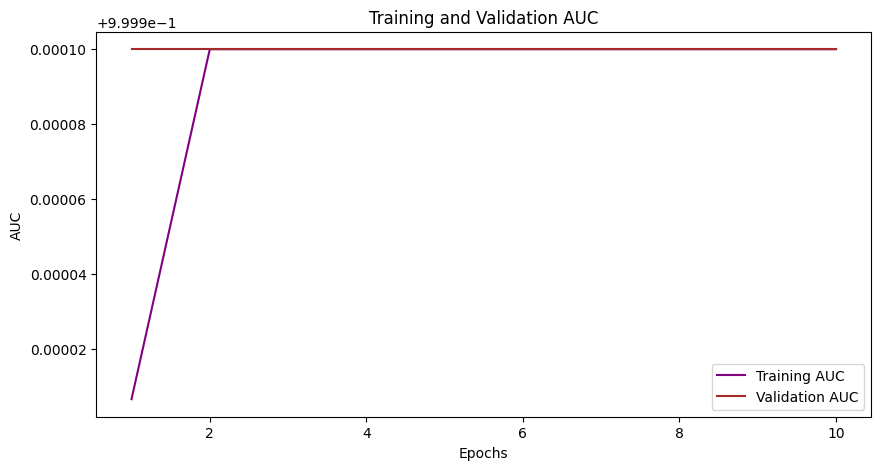

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


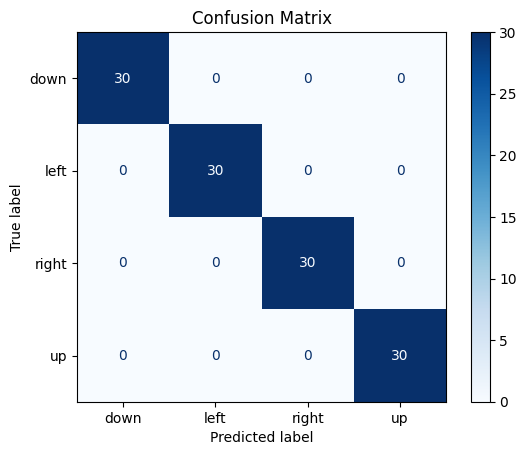

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, ConcatDataset
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # For better plotting aesthetics
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Device configuration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Directories for datasets
data_dirs = [
    '/content/drive/MyDrive/Colab Notebooks/direction/Directions01/Directions01',
    '/content/drive/MyDrive/Colab Notebooks/direction/Directions01_Index/Directions01_Index',
    '/content/drive/MyDrive/Colab Notebooks/direction/Directions01_RGB/Directions01_RGB'
]

# Define transformations
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Function to load datasets
def load_dataset(data_dir):
    return {
        'train': datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=data_transforms),
        'test': datasets.ImageFolder(os.path.join(data_dir, 'test'), transform=data_transforms)
    }

# Load datasets from each directory
train_datasets = []
test_datasets = []

for dir in data_dirs:
    datasets_dict = load_dataset(dir)
    train_datasets.append(datasets_dict['train'])
    test_datasets.append(datasets_dict['test'])

# Concatenate datasets
combined_train_dataset = ConcatDataset(train_datasets)
combined_test_dataset = ConcatDataset(test_datasets)

# Create DataLoaders
dataloaders = {
    'train': DataLoader(combined_train_dataset, batch_size=32, shuffle=True, num_workers=4),
    'test': DataLoader(combined_test_dataset, batch_size=32, shuffle=False, num_workers=4),
}

dataset_sizes = {x: len(dataloaders[x].dataset) for x in ['train', 'test']}
class_names = train_datasets[0].classes
num_classes = len(class_names)

# Function to train a model and return losses and metrics
def train_model(model, criterion, optimizer, num_epochs=10):
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []
    train_aucs = []
    val_aucs = []

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'test']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluation mode

            running_loss = 0.0
            running_corrects = 0
            all_labels = []
            all_preds = []
            all_probs = []

            # Iterate over data
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward pass
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    probs = nn.functional.softmax(outputs, dim=1)
                    loss = criterion(outputs, labels)

                    # Backward and optimize only in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                all_labels.extend(labels.cpu().numpy())
                all_preds.extend(preds.cpu().numpy())
                all_probs.extend(probs.detach().cpu().numpy())  # Detach before converting to NumPy

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            # Compute AUC
            try:
                epoch_auc = roc_auc_score(
                    all_labels,
                    all_probs,
                    multi_class='ovr',
                    average='macro'
                )
            except ValueError:
                # Handle case where AUC cannot be computed
                epoch_auc = np.nan

            if phase == 'train':
                train_losses.append(epoch_loss)
                train_accs.append(epoch_acc.item())
                train_aucs.append(epoch_auc)
            else:
                val_losses.append(epoch_loss)
                val_accs.append(epoch_acc.item())
                val_aucs.append(epoch_auc)

            print(f'{phase.capitalize()} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f} AUC: {epoch_auc:.4f}')

    return train_losses, val_losses, train_accs, val_accs, train_aucs, val_aucs

# Initialize the ResNet-18 model
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes)
model = model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 10
train_losses, val_losses, train_accs, val_accs, train_aucs, val_aucs = train_model(
    model, criterion, optimizer, num_epochs=num_epochs)

# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_accs, label='Training Accuracy', color='green')
plt.plot(range(1, num_epochs+1), val_accs, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot Training and Validation AUC
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_aucs, label='Training AUC', color='purple')
plt.plot(range(1, num_epochs+1), val_aucs, label='Validation AUC', color='brown')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.title('Training and Validation AUC')
plt.legend()
plt.show()

# Evaluate on the test set and calculate confusion matrix
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in dataloaders['test']:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate confusion matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


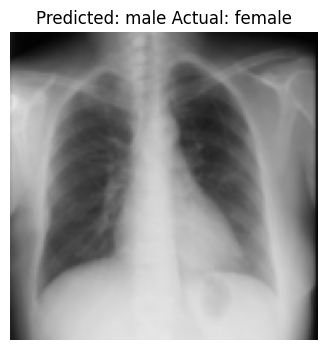

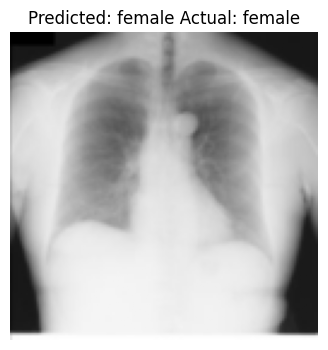

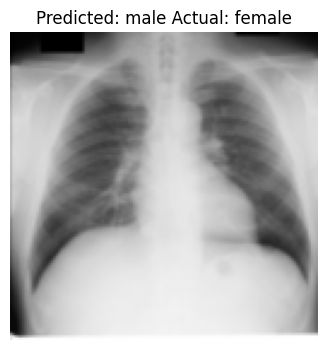

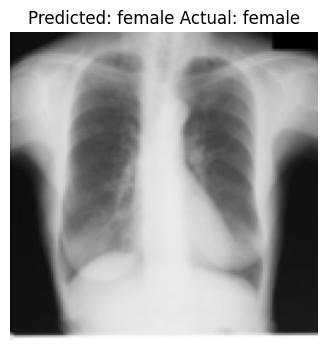

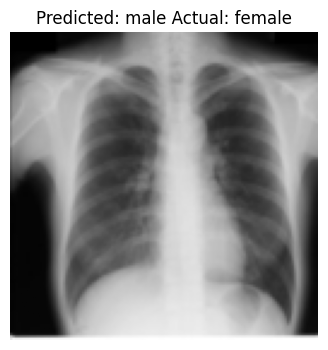